In [6]:
# TASK QUESTIONS:
# None

In [7]:
import numpy as np
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt

dataset_path = os.getcwd() + r"\data_set"

# Function to load and resize images from a directory
def load_images(directory, target_size=(200, 200)):
    image_list = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
            image_path = os.path.join(directory, filename)
            img = Image.open(image_path)
            
            # Convert the image to RGB (if it's not already)
            img = img.convert("RGB")
            
            # Resize the image to a common size
            img_resized = img.resize(target_size)
            
            # Convert the resized image to a numpy array
            img_array = np.array(img_resized)
            
            image_list.append(img_array)
    return image_list

# Load and resize images from the dataset directory
image_list = load_images(dataset_path)

# Ensure all images have the same number of channels (3)
image_list = [img[:, :, :3] for img in image_list]

# Convert the list of resized images to a numpy array
image_array = np.array(image_list)

for img in image_array:
    print(img.shape)
# Display the shape of the array
print("Shape of the image array:", image_array.shape)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Shape of the image array: (25, 200, 200, 3)


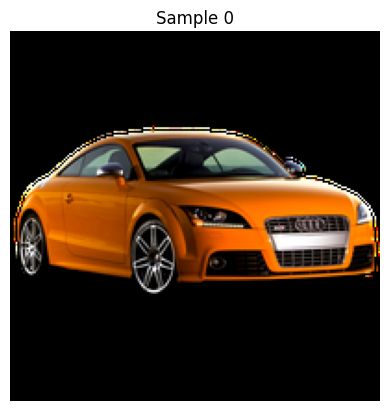

In [8]:
import matplotlib.pyplot as plt

def plot_sample(sample_index, images):
    """
    Plot a sample image from the dataset.

    Parameters:
    - sample_index (int): Index of the sample to be plotted.
    - images (numpy.ndarray): Array of images with shape (n, x, y, 3).

    Returns:
    - None
    """
    if 0 <= sample_index < len(images):
        plt.imshow(images[sample_index])
        plt.title(f"Sample {sample_index}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Invalid sample index: {sample_index}. Please choose a valid index.")

# Example:
# Assuming you have loaded your images into the 'image_array' variable
plot_sample(0, image_array)


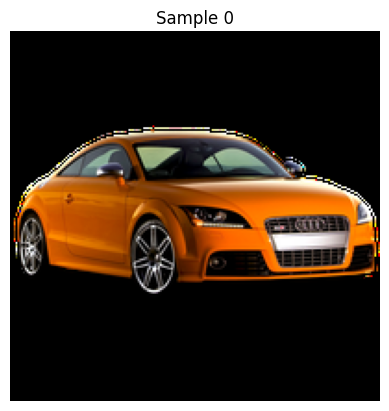

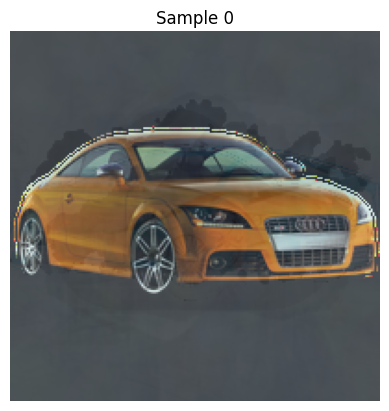

In [9]:
# Normalization
X_norm = image_array / 255.0

# Standardization
X_mean = X_norm.mean(axis=(0, 1, 2), keepdims=True)
X_std = X_norm.std(axis=(0, 1, 2), keepdims=True)
X_standardized = (X_norm - X_mean) / X_std

# ZCA Whitening
epsilon = 0.1
cov_matrix = np.cov(X_standardized.reshape(X_standardized.shape[0], -1), rowvar=True)
U, S, V = np.linalg.svd(cov_matrix)
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_standardized.reshape(X_standardized.shape[0], -1))
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

# Display the processed images
plot_sample(0, X_norm)  # Plot the first sample from the normalized dataset

# Reshape X_ZCA_rescaled to the original shape of the images
X_ZCA_reshaped = X_ZCA_rescaled.reshape(image_array.shape)

plot_sample(0, X_ZCA_reshaped)  # Plot the first sample from the ZCA whitened dataset
